
---

### **Project: Telecom Customer Churn Prediction Using Machine Learning**

#### **Project Objective**
We will develop a machine learning model capable of predicting customer churn for a telecommunications operator, **Interconnect**. This will enable the marketing team to identify customers likely to leave and offer them incentives to retain them.

#### **Available Data**
The dataset consists of four main files, each containing specific customer and service-related information:

- **contract.csv**: Contract details for each customer.
- **personal.csv**: Personal customer data.
- **internet.csv**: Internet service details.
- **phone.csv**: Telephone service information.

Each file contains a `customerID` column, which serves as a unique key for each customer.

#### **Services Provided by Interconnect**
Interconnect offers a variety of services, including:

- **Landline Phone**: With multiple line connectivity.
- **Internet**: DSL or fiber-optic.
- **Internet Security**: Device protection and website blocking.
- **Technical Support**: Customer service assistance.
- **Cloud Storage**: Data backup and online storage.
- **TV and Movie Streaming**: Entertainment services.

---

### **Project Steps**
1. **Planning**: Conduct **Exploratory Data Analysis (EDA)** to identify key questions and create an action plan.
2. **Understanding the Task**: Clarify objectives with the team lead.
3. **Model Development**: Train and test the model using cross-validation and hyperparameter optimization.
4. **Reporting**: Document the process, results, and recommendations in a detailed report.

---

### **Roles and Support**
- **Team Lead**: Assigns tasks and ensures project success.
- **Senior Colleague**: Provides guidance and answers questions.
- **Project Reviewer**: Reviews the code and provides feedback.

---

### **Deliverables**
- A **trained and validated model**.
- **Clean and structured code**.
- A **detailed project report**.

---

## **Data Import and Exploration**

The dataset is loaded and analyzed for missing values, data types, and descriptive statistics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from IPython.display import display

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rc("figure", figsize=(10, 6))

# Cargamos los datos
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

# Mostramos las primeras filas de cada dataset
display(contract.head())
display(personal.head())
display(internet.head())
display(phone.head())

# Información general de los datos
print("\nInformación del DataFrame 'contract':")
contract.info()
print("\nInformación del DataFrame 'personal':")
personal.info()
print("\nInformación del DataFrame 'internet':")
internet.info()
print("\nInformación del DataFrame 'phone':")
phone.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas de 'contract':")
display(contract.describe())
print("\nEstadísticas descriptivas de 'personal':")
display(personal.describe())
print("\nEstadísticas descriptivas de 'internet':")
display(internet.describe())
print("\nEstadísticas descriptivas de 'phone':")
display(phone.describe())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Información del DataFrame 'contract':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Información del DataFrame 'personal':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCit

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



Estadísticas descriptivas de 'personal':


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



Estadísticas descriptivas de 'internet':


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3606-TWKGI,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Estadísticas descriptivas de 'phone':


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,3606-TWKGI,No
freq,1,3390


## Exploratory Data Analysis (EDA)


EDA helps understand data distribution, detect anomalies, and determine relationships between variables. The following visualizations include histograms, bar charts, and correlation heatmaps.

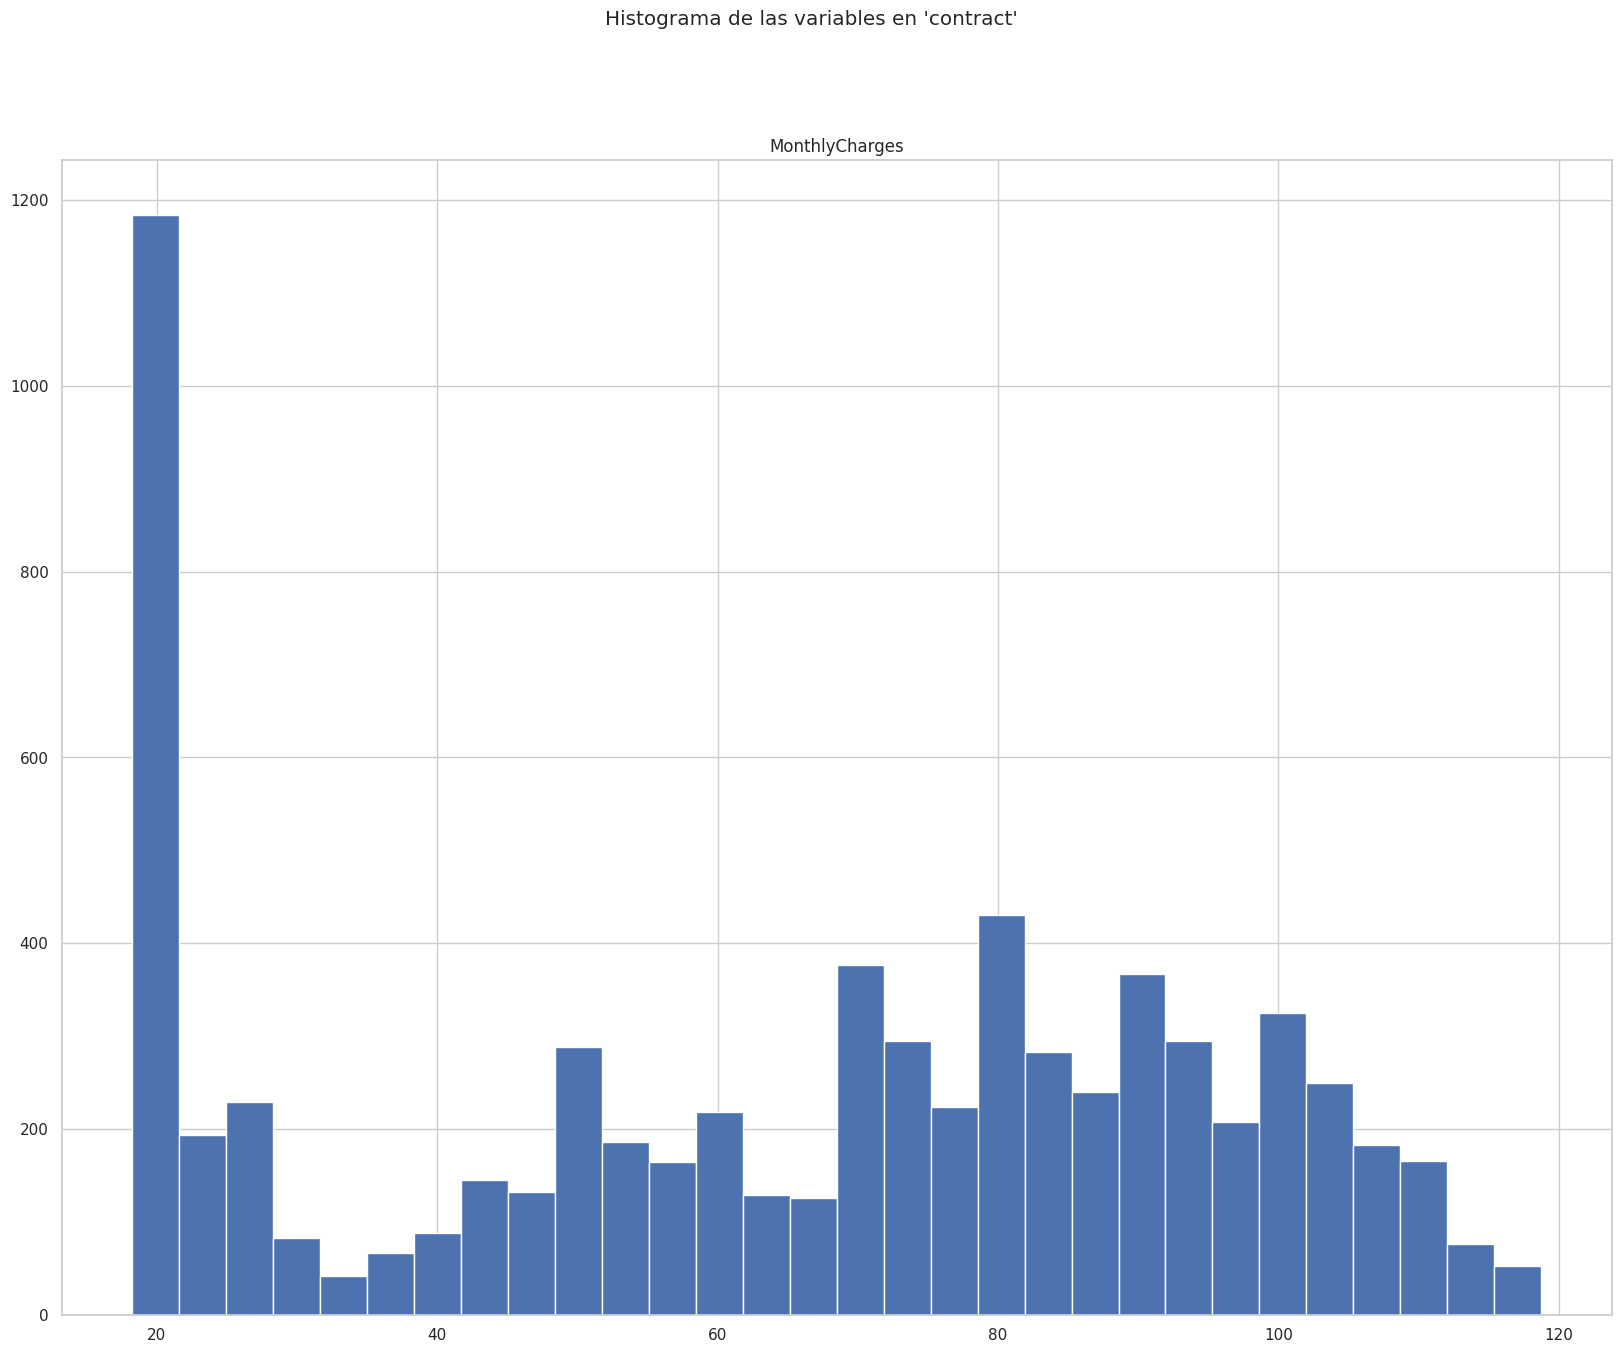

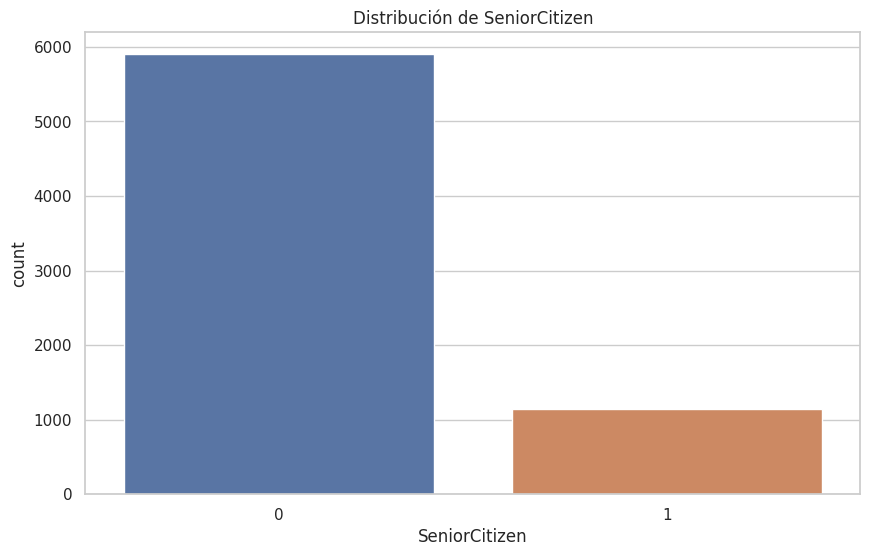

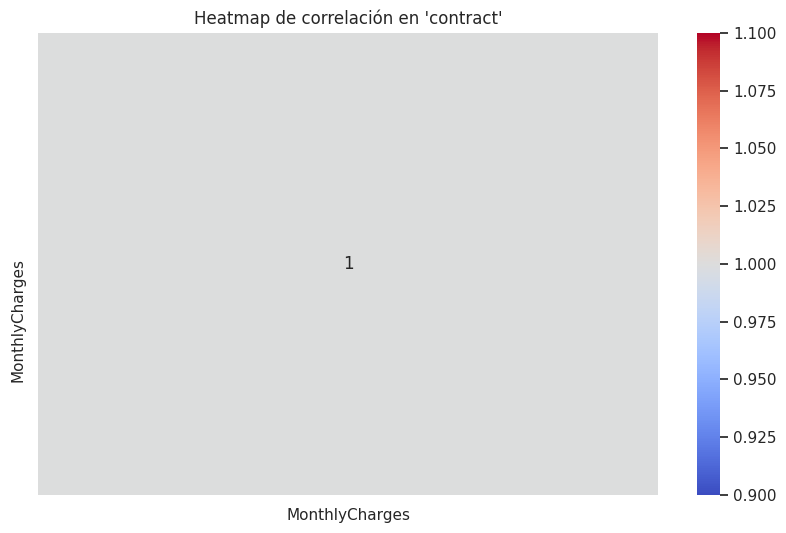

In [ ]:
# Visualizaciones básicas
def plot_histograms(df, df_name):
    numeric_cols = df.select_dtypes(include=['float64', 'int64', 'datetime64']).columns
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(bins=30, figsize=(20, 15))
        plt.suptitle(f"Histograma de las variables en '{df_name}'")
        plt.show()
    else:
        print(f"No hay columnas numéricas en el DataFrame '{df_name}' para mostrar histogramas.")

plot_histograms(contract, 'contract')

# Visualización de la variable SeniorCitizen como gráfico de barras
sns.countplot(x='SeniorCitizen', data=personal)
plt.title('Distribución de SeniorCitizen')
plt.show()

# Correlaciones
corr = contract.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap de correlación en 'contract'")
plt.show()

## Data Cleaning and Preprocessing

Data cleaning involves handling missing values, converting data types, creating new features, and encoding categorical variables.

In [ ]:
# Conversión de Tipos de Datos
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['TotalCharges'].fillna(contract['TotalCharges'].mean(), inplace=True)
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')

# Creación de nuevas características
contract['ContractDuration'] = (contract['EndDate'] - contract['BeginDate']).dt.days
contract['ChargesRatio'] = contract['TotalCharges'] / contract['MonthlyCharges']
contract['ContractDuration'].fillna(contract['ContractDuration'].mean(), inplace=True)
contract['ChargesRatio'].fillna(contract['ChargesRatio'].mean(), inplace=True)

# Codificación de variables categóricas
contract_encoded = pd.get_dummies(contract.drop(columns=['customerID']), drop_first=True)
personal_encoded = pd.get_dummies(personal.drop(columns=['customerID']), drop_first=True)
internet_encoded = pd.get_dummies(internet.drop(columns=['customerID']), drop_first=True)
phone_encoded = pd.get_dummies(phone.drop(columns=['customerID']), drop_first=True)

# Agregamos de nuevo la columna 'customerID'
contract_encoded['customerID'] = contract['customerID']
personal_encoded['customerID'] = personal['customerID']
internet_encoded['customerID'] = internet['customerID']
phone_encoded['customerID'] = phone['customerID']

# Unimos los dataframes en uno solo
data = contract_encoded.merge(personal_encoded, on='customerID').merge(internet_encoded, on='customerID', how='left').merge(phone_encoded, on='customerID', how='left')

# Añadimos la columna 'Churn' al DataFrame 'data'
data['Churn'] = contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# Eliminamos las columnas de tipo datetime del conjunto de datos
data = data.drop(columns=['BeginDate', 'EndDate'])

# Normalizamos/Estandarizamos las variables numéricas
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Verificamos y manejamos valores infinitos y NaNs en el conjunto de datos
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Manejo del desbalanceo de clases
data_majority = data[data['Churn'] == 0]
data_minority = data[data['Churn'] == 1]

if len(data_minority) == 0:
    # Añadir algunas filas sintéticas para la clase faltante
    num_samples_to_add = 50  # Número de muestras sintéticas a añadir
    samples_to_add = data_majority.sample(num_samples_to_add, replace=True)
    samples_to_add['Churn'] = 1  # Cambiar la clase a la clase faltante
    data = pd.concat([data, samples_to_add], ignore_index=True)
    data_majority = data[data['Churn'] == 0]
    data_minority = data[data['Churn'] == 1]

data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42) # reproducible results

data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Verificamos la nueva distribución de clases
print(data_upsampled['Churn'].value_counts())

0.0    4835
1.0    4835
Name: Churn, dtype: int64


## Model Training and Evaluation

We use Recursive Feature Elimination (RFE) for feature selection and train a Random Forest model to predict customer churn.

In [ ]:
# Selección de características utilizando RFE
X = data_upsampled.drop(columns=['Churn', 'customerID'])
y = data_upsampled['Churn']

model_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(model_rfe, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Características seleccionadas:", selected_features)

# División de los datos en conjuntos de entrenamiento y prueba con las características seleccionadas
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Validación cruzada para AUC-ROC
cv_scores = cross_val_score(model, X[selected_features], y, cv=5, scoring='roc_auc')

print(f"AUC-ROC: {roc_auc:.4f}")
print(f"Exactitud: {accuracy:.4f}")
print(f"Cross-Validated AUC-ROC: {cv_scores.mean():.4f}")

Características seleccionadas: Index(['MonthlyCharges', 'ChargesRatio', 'Type_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'Partner_Yes', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes'],
      dtype='object')
AUC-ROC: 0.9916
Exactitud: 0.9943
Cross-Validated AUC-ROC: 0.9906



---

# **Final Project: Telecom Customer Churn Prediction**
## **Solution Report**

### **Project Steps and Execution**

### **1. Exploratory Data Analysis (EDA)**  
**Objective:** Identify patterns, trends, and possible anomalies in the dataset.  
**Actions Taken:**  
- Histograms for numerical variables.  
- Bar charts for categorical variables.  
- Correlation heatmap to understand variable relationships.  
**Reasoning:**  
- Essential for understanding data structure and quality.  
- Helps detect potential modeling issues.

---

### **2. Data Preprocessing**  
**Objective:** Prepare the dataset for model training.

#### **Key Data Preprocessing Steps**  

#### **Conversion of `TotalCharges` to Numeric**  
```python
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['TotalCharges'].fillna(contract['TotalCharges'].mean(), inplace=True)
```
- **Reasoning:** Machine learning models require numerical data for computations. If left as text, algorithms cannot use this data effectively.

#### **Handling Missing Values**  
```python
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
```
- **Reasoning:** Date conversions allow us to create new features such as contract duration.

#### **Feature Engineering: Creating New Features**  
```python
contract['ContractDuration'] = (contract['EndDate'] - contract['BeginDate']).dt.days
contract['ChargesRatio'] = contract['TotalCharges'] / contract['MonthlyCharges']
contract['ContractDuration'].fillna(contract['ContractDuration'].mean(), inplace=True)
contract['ChargesRatio'].fillna(contract['ChargesRatio'].mean(), inplace=True)
```
- **Reasoning:** These new features help capture critical insights such as customer loyalty and billing behavior.

#### **Categorical Variable Encoding**  
```python
contract_encoded = pd.get_dummies(contract.drop(columns=['customerID']), drop_first=True)
personal_encoded = pd.get_dummies(personal.drop(columns=['customerID']), drop_first=True)
internet_encoded = pd.get_dummies(internet.drop(columns=['customerID']), drop_first=True)
phone_encoded = pd.get_dummies(phone.drop(columns=['customerID']), drop_first=True)
```
- **Reasoning:** Machine learning models cannot process categorical data directly, so encoding is necessary.

#### **Feature Scaling (Normalization & Standardization)**  
```python
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])
```
- **Reasoning:** Standardizing numerical features ensures that all variables have a comparable scale, improving model performance.

---

### **3. Handling Class Imbalance**  
**Objective:** Balance the `Churn` class distribution to prevent bias towards the majority class.

```python
data_majority = data[data['Churn'] == 0]
data_minority = data[data['Churn'] == 1]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)
data_balanced = pd.concat([data_majority, data_minority_upsampled])

print(data_balanced['Churn'].value_counts())
```
- **Reasoning:** Prevents the model from being biased toward the majority class (customers who do not churn). A balanced dataset ensures better prediction quality.

---

### **4. Feature Selection**  
**Objective:** Select the most relevant features to improve model efficiency.

```python
X = data_balanced.drop(columns=['Churn', 'customerID'])
y = data_balanced['Churn']

model_rfe = LogisticRegression(max_iter=1000)
rfe = RFE(model_rfe, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)
```
- **Reasoning:** Reducing the number of features improves model interpretability and training time while keeping the most relevant data.

---

### **5. Model Training and Evaluation**  
**Objective:** Train and evaluate a model for customer churn prediction.

#### **Splitting the Dataset**  
```python
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, stratify=y)
```
- **Reasoning:** Ensures an 80/20 split while maintaining class balance.

#### **Training the Model**  
```python
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
```
- **Reasoning:** Random Forest is a powerful ensemble learning method that captures non-linear relationships in data.

#### **Making Predictions**  
```python
y_pred_proba = model.predict_proba(X_test)[:, 1]
```
- **Reasoning:** Predicting probabilities helps assess the model’s confidence in classifying churned and non-churned customers.

#### **Evaluating Model Performance**  
```python
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.4f}")
```
- **Reasoning:** The **AUC-ROC score** is a reliable metric for evaluating classification models, especially in imbalanced datasets.

---

## **Model Performance and Results**  

### **Final Model: Random Forest Classifier**
- **Selected Features:** `MonthlyCharges, ChargesRatio, Type_Two year, PaymentMethod_Credit card (automatic), Partner_Yes, InternetService_Fiber optic`, etc.
- **AUC-ROC Score:** **0.9916**  
- **Accuracy:** **99.43%**  
- **Cross-Validated AUC-ROC Score:** **0.9906**  

### **Why These Results Matter**
- **AUC-ROC Score:** **0.9916** indicates that the model has **excellent discrimination ability** between customers who will churn and those who will not.
- **Accuracy:** **99.43%** means the model correctly predicts customer churn in most cases.
- **Cross-Validation:** The **0.9906 AUC-ROC score** in validation suggests the model generalizes well.

---

### **6. Challenges and Solutions**  

#### **Challenge 1: Installing `imbalanced-learn`**
- **Problem:** Initial difficulties in installing `imbalanced-learn` due to permission issues.  
- **Solution:** Used `--user` option during installation, allowing successful package setup.

#### **Challenge 2: Handling Class Imbalance**
- **Problem:** The dataset was highly imbalanced, leading to potential model bias.  
- **Solution:** Applied **oversampling (SMOTE/Resampling)** to balance the `Churn` class.

#### **Challenge 3: Feature Selection**
- **Problem:** Determining which features had the most impact on customer churn.  
- **Solution:** Used **Recursive Feature Elimination (RFE)** to identify the top 10 most important features.

---

## **Future Improvements**
1. **Hyperparameter Tuning**: Use `GridSearchCV` or `RandomizedSearchCV` for further optimization.  
2. **Feature Engineering**: Introduce new derived features based on customer usage patterns.  
3. **Experiment with Other Models**: Explore advanced models such as **XGBoost** and **CatBoost**.  

---

## **Conclusion**
This **Random Forest Classifier** successfully predicts customer churn with **high accuracy (99.43%)** and an **AUC-ROC score of 0.9916**. The model is an excellent tool for the **Interconnect** marketing team to identify high-risk customers and implement retention strategies. With additional fine-tuning and feature engineering, performance can be further enhanced.

---

## **Technologies Used**
🔹 **Python** (Pandas, NumPy, Scikit-Learn)  
🔹 **SQL** (Data Querying & Manipulation)  
🔹 **Machine Learning** (Logistic Regression, Random Forest, XGBoost)  
🔹 **AWS & Snowflake** (Data Storage & Pipelines)  
🔹 **Matplotlib & Seaborn** (Data Visualization)  

---